In [685]:
#data preparation(identifying all locations in the data that have null (missing or NaN) data values)
import pandas as pd

df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')

df[pd.isnull(df).any(axis=1)]


,A,P,C,LK,WK,A_Coef,LKG,target


In [770]:
#KNN with Manhattan distance
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')
X, y = df.drop("target", axis = 1), df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)
X_train=X_train.to_numpy()
X_valid=X_valid.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
class KNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def predict(self, X):
        predictions = []

        for x in X:

            distances = [self.manhattan_distance(x, x_train) for x_train in self.X_train]

            k_neighbors_indices = np.argsort(distances)[:self.k]

            k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]

            predicted_label = max(set(k_neighbor_labels), key=k_neighbor_labels.count)
            predictions.append(predicted_label)

        return np.array(predictions)

knn_classifier = KNN(k=5)
knn_classifier.fit(X_train, y_train)

predictions = knn_classifier.predict(X_valid)
accuracy=accuracy_score(predictions,y_valid)
print(accuracy)

0.8095238095238095


In [767]:
train_error=[]
valid_error=[]
m=[1,20,40,60,80,100,120]
for ind in m:
    knn_classifier = KNN(k=5)
    knn_classifier.fit(X_train[:ind], y_train[:ind])
    
    predictions1 = knn_classifier.predict(X_valid)
    predictions2 = knn_classifier.predict(X_train[:ind])
    accuracy1=accuracy_score(predictions1,y_valid)
    accuracy2=accuracy_score(predictions2,y_train[:ind])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)
print(train_error)
print(valid_error)

[0.0, 0.09999999999999998, 0.09999999999999998, 0.08333333333333337, 0.0625, 0.06000000000000005, 0.05833333333333335]
[0.6666666666666667, 0.1428571428571429, 0.1428571428571429, 0.09523809523809523, 0.1428571428571429, 0.1428571428571429, 0.1428571428571429]


Text(0, 0.5, 'Error (1 - accuracy)')

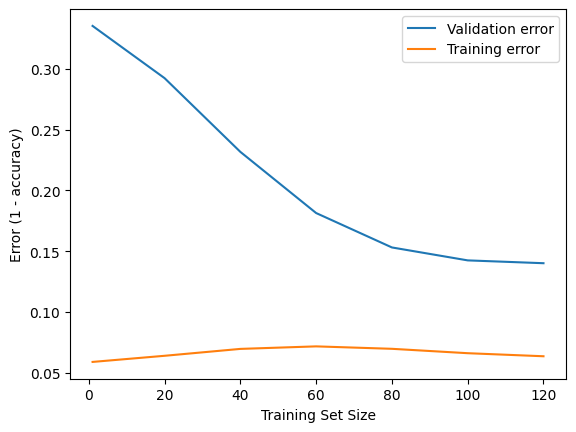

In [768]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=2),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=2),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')


In [779]:
#KNN with Euclidean distance(without normalization)
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')
X, y = df.drop("target", axis = 1), df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)
X_train=X_train.to_numpy()
X_valid=X_valid.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
class KNN:
    def __init__(self, k=5):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def predict(self, X):
        predictions = []

        for x in X:

            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

            k_neighbors_indices = np.argsort(distances)[:self.k]

            k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]

            predicted_label = max(set(k_neighbor_labels), key=k_neighbor_labels.count)
            predictions.append(predicted_label)

        return np.array(predictions)

knn_classifier = KNN(k=5)
knn_classifier.fit(X_train, y_train)

predictions = knn_classifier.predict(X_valid)
accuracy=accuracy_score(predictions,y_valid)
print(accuracy)

0.9047619047619048


In [780]:
train_error=[]
valid_error=[]
m=[1,20,40,60,80,100,120]
for ind in m:
    knn_classifier = KNN(k=5)
    knn_classifier.fit(X_train[:ind], y_train[:ind])
    
    predictions1 = knn_classifier.predict(X_valid)
    predictions2 = knn_classifier.predict(X_train[:ind])
    accuracy1=accuracy_score(predictions1,y_valid)
    accuracy2=accuracy_score(predictions2,y_train[:ind])

    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)
print(train_error)
print(valid_error)

[0.0, 0.09999999999999998, 0.09999999999999998, 0.06666666666666665, 0.0625, 0.06999999999999995, 0.08333333333333337]
[0.6666666666666667, 0.1428571428571429, 0.23809523809523814, 0.19047619047619047, 0.23809523809523814, 0.23809523809523814, 0.1428571428571429]


Text(0, 0.5, 'Error (1 - accuracy)')

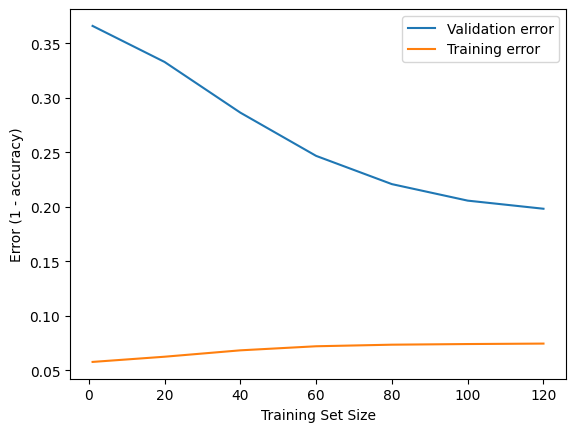

In [781]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error, sigma=2),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=2),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')


In [565]:
#DECISION TREE
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of the feature by which the node splits the data
        self.threshold = threshold  # Threshold for splitting
        self.left = left  # Left node
        self.right = right  # Right node
        self.value = value  # Class (for leaf nodes)
       
def decision_tree_classifier(X, y, depth=0, max_depth=None):
    
    X = np.array(X)
    y = np.array(y)
    classes=np.unique(y)
    # Создание узла дерева
    node = TreeNode()
  
    if depth == max_depth or len(set(y)) == 1:
        if len(y) == 0:
            node.value = None  
        else:
            node.value = list(set(y))[0]  
    else:
        num_features = X.shape[1]
        # Choosing the best division
        best_gini = 1.0
        for feature_index in range(num_features):
            for threshold in set(X[:, feature_index]):
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold
                gini = calculate_gini_impurity(y[left_indices], y[right_indices],classes)
                if gini < best_gini:
                    best_gini = gini
                    node.feature_index = feature_index
                    node.threshold = threshold
                    left_X, left_y = X[left_indices], y[left_indices]
                    right_X, right_y = X[right_indices], y[right_indices]
                   
                    node.left = decision_tree_classifier(left_X, left_y, depth + 1, max_depth)
                    node.right = decision_tree_classifier(right_X, right_y, depth + 1, max_depth)
    return node

def calculate_gini_impurity(y_left, y_right,classes):
    def gini(y, classes):

        y = y.reshape(-1, )         # flattens the 2D array into 1D array for simpler calculations
        if not y.shape[0]:
            return 0
    
        probs = []
        for cls in classes:
            probs.append((y == cls).sum() / y.shape[0]) # compute class probabilities
    
        p = np.array(probs)
        return 1 - ((p*p).sum())
    
    total_samples = len(y_left) + len(y_right)
    p_left = len(y_left) / total_samples
    p_right = len(y_right) / total_samples
    gini_left = gini(y_left,classes)
    gini_right = gini(y_right,classes)
    gini_impurity = p_left * gini_left + p_right* gini_right

    return gini_impurity

In [566]:
def predict(tree, x):

    if tree.value is not None:
        return tree.value
    if x[tree.feature_index] <= tree.threshold:
        return predict(tree.left, x)
    else:
        return predict(tree.right, x)

In [785]:
#Max depth=3
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')
X, y = df.drop("target", axis = 1), df["target"]
# apply normalization techniques 
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)
tree = decision_tree_classifier(X_train, y_train, 0, 3)

X_valid=X_valid.to_numpy()
y_pred = [predict(tree, x) for x in X_valid]

accuracy = accuracy_score( y_pred, y_valid)
print(accuracy)

0.6666666666666666


In [786]:
train_error=[]
valid_error=[]
X_train=X_train.to_numpy()
m=[1,20,40,60,80,100,120]
for j in m:
   
    tree = decision_tree_classifier(X_train[:j], y_train[:j], 0, 3)
    
    y_pred1 = [predict(tree, x) for x in X_valid]
    y_pred2 = [predict(tree,x) for x in X_train[:j]]

    accuracy1 = accuracy_score( y_pred1, y_valid)
    accuracy2 = accuracy_score( y_pred2, y_train[:j])

    train_error.append(1-accuracy2)
  
    valid_error.append(1-accuracy1)
print(train_error)
print(valid_error)

[0.0, 0.0, 0.42500000000000004, 0.3833333333333333, 0.375, 0.36, 0.3416666666666667]
[0.6666666666666667, 0.2857142857142857, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337]


Text(0.5, 1.0, 'Max depth=3')

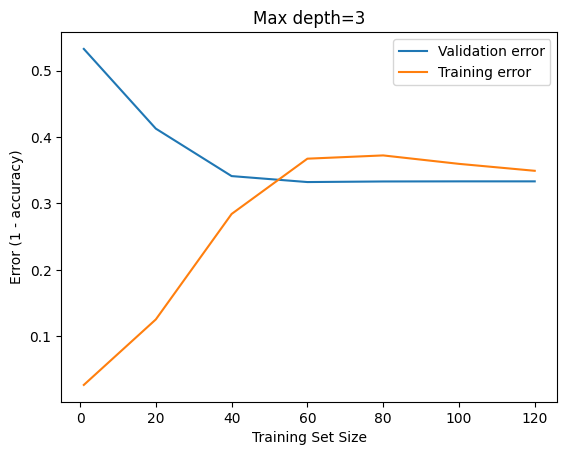

In [787]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error,sigma=1),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=1),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')
plt.title('Max depth=3')

In [788]:

from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')
X, y = df.drop("target", axis = 1), df["target"]
# apply normalization techniques 
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)#0.9*0.11=0.1
tree = decision_tree_classifier(X_train, y_train, 0, 4)

X_valid=X_valid.to_numpy()
y_pred = [predict(tree, x) for x in X_valid]

accuracy = accuracy_score( y_pred, y_valid)
print(accuracy)

0.8571428571428571


In [789]:
train_error=[]
valid_error=[]
X_train=X_train.to_numpy()
m=[1,20,40,60,80,100,120]
for j in m:
   
    tree = decision_tree_classifier(X_train[:j], y_train[:j], 0, 4)
    
    y_pred1 = [predict(tree, x) for x in X_valid]
    y_pred2 = [predict(tree,x) for x in X_train[:j]]

    accuracy1 = accuracy_score( y_pred1, y_valid)
    accuracy2 = accuracy_score( y_pred2, y_train[:j])

    train_error.append(1-accuracy2)
  
    valid_error.append(1-accuracy1)
print(train_error)
print(valid_error)

[0.0, 0.0, 0.07499999999999996, 0.06666666666666665, 0.0625, 0.050000000000000044, 0.33333333333333337]
[0.6666666666666667, 0.2857142857142857, 0.19047619047619047, 0.19047619047619047, 0.1428571428571429, 0.1428571428571429, 0.33333333333333337]


Text(0.5, 1.0, 'Max depth=4')

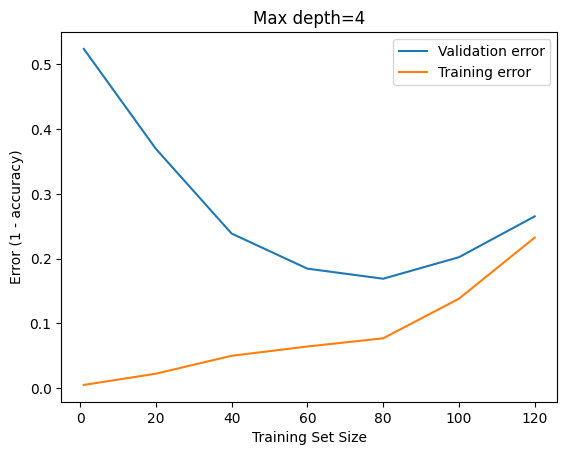

In [790]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error,sigma=1),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=1),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')
plt.title('Max depth=4')

In [791]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')
X, y = df.drop("target", axis = 1), df["target"]
# apply normalization techniques 
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)
tree = decision_tree_classifier(X_train, y_train, 0, 5)

X_valid=X_valid.to_numpy()

y_pred = [predict(tree, x) for x in X_valid]

accuracy = accuracy_score( y_pred, y_valid)
print(accuracy)

0.8571428571428571


In [792]:
train_error=[]
valid_error=[]
X_train=X_train.to_numpy()
m=[1,20,40,60,80,100,120]
for j in m:
   
    tree = decision_tree_classifier(X_train[:j], y_train[:j], 0, 5)
    
    y_pred1 = [predict(tree, x) for x in X_valid]
    y_pred2 = [predict(tree,x) for x in X_train[:j]]

    accuracy1 = accuracy_score( y_pred1, y_valid)
    accuracy2 = accuracy_score( y_pred2, y_train[:j])

    train_error.append(1-accuracy2)
  
    valid_error.append(1-accuracy1)
print(train_error)
print(valid_error)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.050000000000000044]
[0.6666666666666667, 0.2857142857142857, 0.19047619047619047, 0.23809523809523814, 0.19047619047619047, 0.19047619047619047, 0.1428571428571429]


Text(0.5, 1.0, 'Max depth=5')

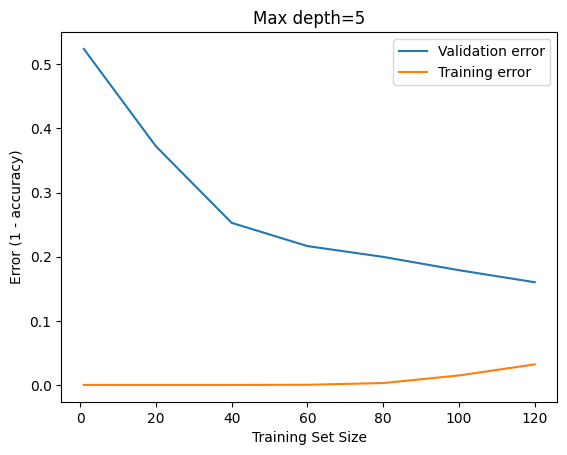

In [793]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error,sigma=1),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=1),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')
plt.title('Max depth=5')

In [711]:
#One vs all without normalization
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class LogisticRegression:
    def __init__(self, learning_rate=0.35, n_iterations=4000, reg_param=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.reg_param = reg_param  # Regularization parameter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Update weights and bias using gradient descent with regularization
            dw = (1 / m) * (np.dot(X.T, (predictions - y)) + self.reg_param * self.weights)
            db = (1 / m) * np.sum(predictions - y)  

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if p >= 0.5 else 0 for p in predictions]


class OneVsAll:
    def __init__(self, classifier):
        self.classifiers = {}
        self.classifier = classifier

    def fit(self, X, y):
        unique_classes = set(y)
        for class_label in unique_classes:
            binary_y = np.where(y == class_label, 1, 0)
            model = self.classifier()
            model.fit(X, binary_y)
            self.classifiers[class_label] = model

    def predict(self, X):
        all_predictions = np.zeros((X.shape[0], len(self.classifiers)))
        for i, (class_label, model) in enumerate(self.classifiers.items()):
            predictions = model.predict(X)
            all_predictions[:, i] = predictions

        final_predictions = np.argmax(all_predictions, axis=1)
        return final_predictions


df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')

X, y = df.drop("target", axis = 1), df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)


ova_classifier = OneVsAll(LogisticRegression)
ova_classifier.fit(X_train, y_train)

predictions = ova_classifier.predict(X_valid)

accuracy = accuracy_score(y_valid, predictions)

print(f'Accuracy: {accuracy}')


Accuracy: 0.7619047619047619


In [739]:
#One vs all with normalization
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class LogisticRegression:
    def __init__(self, learning_rate=0.35, n_iterations=4000, reg_param=0.1):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.reg_param = reg_param  # Regularization parameter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Update weights and bias using gradient descent with regularization
            dw = (1 / m) * (np.dot(X.T, (predictions - y)) + self.reg_param * self.weights)
            db = (1 / m) * np.sum(predictions - y)  

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if p >= 0.5 else 0 for p in predictions]


class OneVsAll:
    def __init__(self, classifier):
        self.classifiers = {}
        self.classifier = classifier

    def fit(self, X, y):
        unique_classes = set(y)
        for class_label in unique_classes:
            binary_y = np.where(y == class_label, 1, 0)
            model = self.classifier()
            model.fit(X, binary_y)
            self.classifiers[class_label] = model

    def predict(self, X):
        all_predictions = np.zeros((X.shape[0], len(self.classifiers)))
        for i, (class_label, model) in enumerate(self.classifiers.items()):
            predictions = model.predict(X)
            all_predictions[:, i] = predictions

        final_predictions = np.argmax(all_predictions, axis=1)
        return final_predictions


df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')

X, y = df.drop("target", axis = 1), df["target"]

# apply normalization techniques 
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)


ova_classifier = OneVsAll(LogisticRegression)
ova_classifier.fit(X_train, y_train)

predictions = ova_classifier.predict(X_valid)

accuracy = accuracy_score(y_valid, predictions)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8095238095238095


In [740]:
train_error=[]
valid_error=[]
m=[1,20,40,60,80,100,120]
for j in m:
    ova_classifier = OneVsAll(LogisticRegression)
    ova_classifier.fit(X_train[:j], y_train[:j])

# Make predictions
    predictions1 = ova_classifier.predict(X_valid)
    predictions2 = ova_classifier.predict(X_train[:j])
# Evaluate the performance
    accuracy1 = accuracy_score(y_valid, predictions1)
    accuracy2 = accuracy_score(y_train[:j], predictions2)
    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)
    
print(train_error)
print(valid_error)

[0.0, 0.15000000000000002, 0.09999999999999998, 0.1166666666666667, 0.09999999999999998, 0.07999999999999996, 0.08333333333333337]
[0.6666666666666667, 0.19047619047619047, 0.23809523809523814, 0.23809523809523814, 0.23809523809523814, 0.19047619047619047, 0.19047619047619047]


Text(0, 0.5, 'Error (1 - accuracy)')

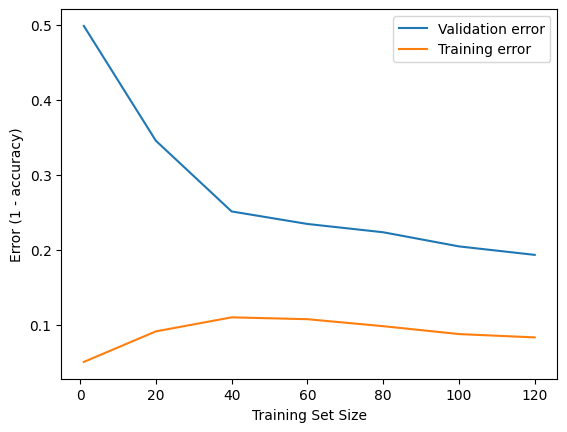

In [741]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error,sigma=1),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=1),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')

In [746]:
#One vs All with differen learning rate and regul.parameter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class LogisticRegression:
    def __init__(self, learning_rate=10, n_iterations=4000, reg_param=0.0005):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.reg_param = reg_param  # Regularization parameter
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Update weights and bias using gradient descent with regularization
            dw = (1 / m) * (np.dot(X.T, (predictions - y)) + self.reg_param * self.weights)
            db = (1 / m) * np.sum(predictions - y)  

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if p >= 0.5 else 0 for p in predictions]


class OneVsAll:
    def __init__(self, classifier):
        self.classifiers = {}
        self.classifier = classifier

    def fit(self, X, y):
        unique_classes = set(y)
        for class_label in unique_classes:
            binary_y = np.where(y == class_label, 1, 0)
            model = self.classifier()
            model.fit(X, binary_y)
            self.classifiers[class_label] = model

    def predict(self, X):
        all_predictions = np.zeros((X.shape[0], len(self.classifiers)))
        for i, (class_label, model) in enumerate(self.classifiers.items()):
            predictions = model.predict(X)
            all_predictions[:, i] = predictions

        final_predictions = np.argmax(all_predictions, axis=1)
        return final_predictions


df = pd.read_csv('/Users/asik/Downloads/Seed_Data.csv')

X, y = df.drop("target", axis = 1), df["target"]

# apply normalization techniques 
for column in X.columns: 
    X[column] = X[column]  / X[column].abs().max() 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.11, random_state=1)


ova_classifier = OneVsAll(LogisticRegression)
ova_classifier.fit(X_train, y_train)

predictions = ova_classifier.predict(X_valid)

accuracy = accuracy_score(y_valid, predictions)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9523809523809523


In [743]:
train_error=[]
valid_error=[]
m=[1,20,40,60,80,100,120]
for j in m:
    ova_classifier = OneVsAll(LogisticRegression)
    ova_classifier.fit(X_train[:j], y_train[:j])

# Make predictions
    predictions1 = ova_classifier.predict(X_valid)
    predictions2 = ova_classifier.predict(X_train[:j])
# Evaluate the performance
    accuracy1 = accuracy_score(y_valid, predictions1)
    accuracy2 = accuracy_score(y_train[:j], predictions2)
    train_error.append(1-accuracy2)
    valid_error.append(1-accuracy1)
    


Text(0, 0.5, 'Error (1 - accuracy)')

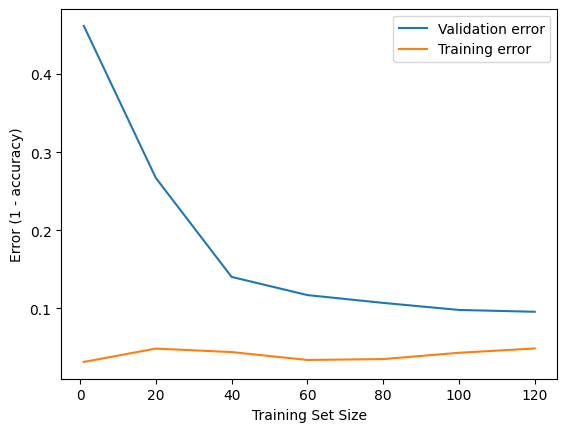

In [737]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
plt.plot(m,gaussian_filter1d(valid_error,sigma=1),label='Validation error')
plt.plot(m,gaussian_filter1d(train_error,sigma=1),label='Training error')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - accuracy)')